In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams

In [2]:

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 22})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [3]:
#averaging five sets into one
def all5avg(time1,time2, time3, time4, time5):
    dat=[time1, time2, time3, time4, time5]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t',skip_header=12))
    df=np.array(df)
    dfavg=(df[0,:,:]+df[1,:,:]+df[2,:,:]+df[3,:,:]+df[4,:,:])/5
    name=time1[:10]
    return (np.savetxt(name +'.dat', dfavg, delimiter='\t'))

In [4]:
#CH  substracting water
def sametemp_ch( data1, data2, data3, data4, data5, dataw):
    dat=[data1, data2, data3, data4, data5]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]-df_w[:,1]
    
    color=['red','blue','green','white','cyan','yellow']
    lev=['CH1','CH2','CH3','CH4','CH5']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend()
    ax.set_xlim([0.03, 0.42])
    ax.set_ylim([0.04, 3])
    ax.set_yscale('log')

    name=data1[7:10]
    return plt.savefig(name)
    plt.show()

In [5]:
#CH without substracting water
def sametemp_ch2( data1, data2, data3, data4, data5, dataw):
    dat=[data1, data2, data3, data4, data5, dataw]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
   
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    color=['red','blue','green','white','cyan','yellow', 'purple']
    lev=['CH1','CH2','CH3','CH4','CH5', 'water']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend()
    ax.set_xlim([0.03, 0.42])
    ax.set_ylim([0.04, 5])
    ax.set_yscale('log')

    name=data1[7:10]
    return plt.savefig('Fin'+str(name))
    plt.show()

In [6]:
#substracting dppc with(0.01)Au and without gold
def subs_ch( data1, data5, dataw ):
    dat=[data1, data5]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]-df_w[:,1]
    
    qf=q[0,:]
    If=I[1,:]-I[0,:]
    
    color=['blue','white']
    lev=['Ch1=0mgAu','Ch5=0.0264mgAu']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.plot(qf,If, color='red',linewidth=4,label='0.01mgAu - 0mgAu')
    ax.legend()
    ax.set_xlim([0.05, 0.5])
    ax.set_ylim([-0.5, 1.5])
    #ax.set_yscale('log')
    name=data1[7:10]
    #return plt.savefig('Sub'+str(name))
    plt.show()

In [7]:
#substracting dppc with(0.01)Au and without gold (not substracting water)
def subs_ch2( data1, data5 ):
    dat=[data1, data5]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    
    q = df[:,:,0]  #size (2, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    qf=q[0,:]
    If=I[1,:]-I[0,:]
    
    color=['blue','white']
    lev=['Ch1=0mgAu','Ch5=0.0264mgAu']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.plot(qf,If, color='red',linewidth=4,label='Ch5-Ch1(0.0264mgAu - 0mgAu')
    ax.legend()
    ax.set_xlim([0.05, 0.5])
    ax.set_ylim([-0.1, 1.3])
    #ax.set_yscale('log')
    name=data1[7:10]
    return plt.savefig('Sub'+str(name))
    plt.show()

In [8]:
#CH 

#Ch1: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol
#Ch2: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0013 mg AuNPs
#Ch3: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0066 mg AuNPs
#Ch4: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0132 mg AuNPs
#Ch5: 40 µl miliQ water + 1 mg DPPC + 1 mg DOPC + 0.17 mg Chol + 0.0264 mg AuNPs

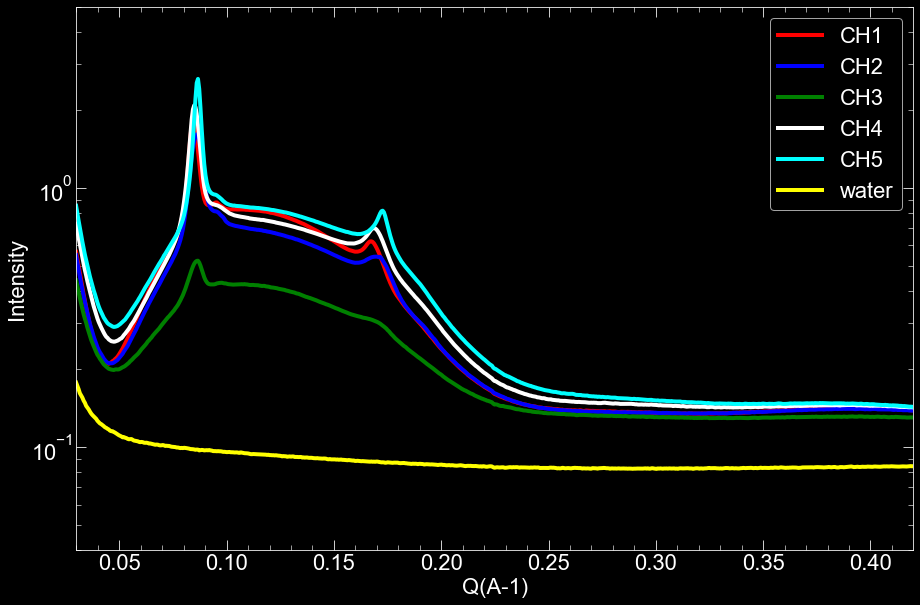

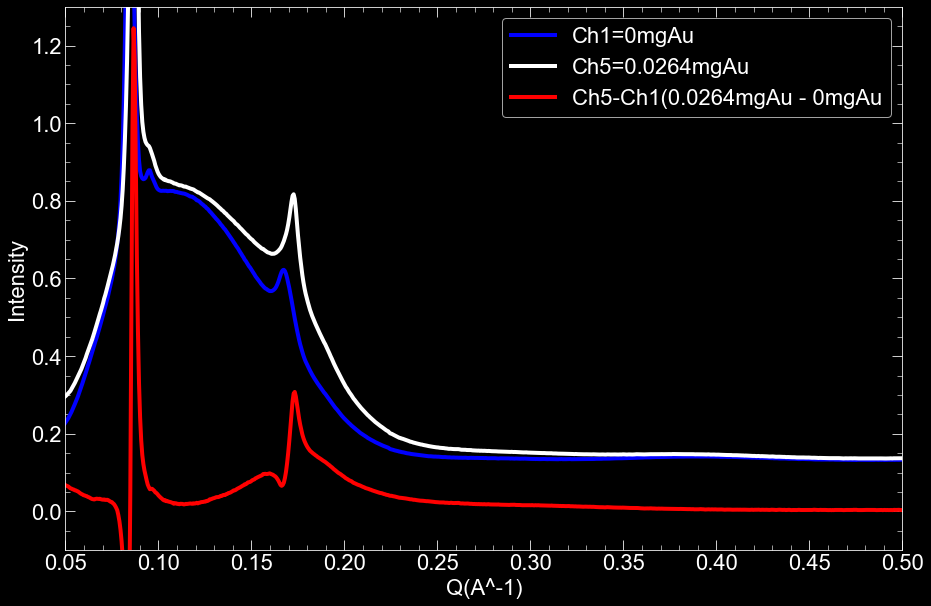

In [9]:
#10 K Ch
sametemp_ch2('SCh1_00144.dat', 'SCh2_00145.dat',
        'SCh3_00146.dat','SCh4_00147.dat',
        'SCh5_00148.dat', 'SH2O_00152.dat')

subs_ch2('SCh1_00144.dat', 'SCh5_00148.dat')

In [ ]:
#25 K Ch
sametemp_ch2('SCh1_00157.dat', 'SCh2_00158.dat',
        'SCh3_00159.dat','SCh4_00160.dat',
        'SCh5_00161.dat','SH2O_00165.dat')

subs_ch2('SCh1_00157.dat', 'SCh5_00161.dat')

In [ ]:
#40 K Ch
sametemp_ch2('SCh1_00170.dat', 'SCh2_00171.dat',
        'SCh3_00172.dat','SCh4_00173.dat',
        'SCh5_00174.dat','SH2O_00178.dat')
subs_ch2('SCh1_00170.dat','SCh5_00174.dat')

In [ ]:
#50 K Ch
sametemp_ch2('SCh1_00183.dat', 'SCh2_00184.dat',
        'SCh3_00185.dat','SCh4_00186.dat',
        'SCh5_00187.dat','SH2O_00191.dat')
subs_ch2('SCh1_00183.dat', 'SCh5_00187.dat')

In [ ]:
#25 K Ch
sametemp_ch2('SCh1_00196.dat', 'SCh2_00197.dat',
        'SCh3_00198.dat','SCh4_00199.dat',
        'SCh5_00200.dat','SH2O_00204.dat')
subs_ch2('SCh1_00196.dat', 'SCh5_00200.dat')

In [ ]:
#20 K Ch
sametemp_ch2('SCh1_00209.dat', 'SCh2_00210.dat',
        'SCh3_00211.dat','SCh4_00212.dat',
        'SCh5_00213.dat','SH2O_00217.dat')
subs_ch2('SCh1_00209.dat', 'SCh5_00213.dat')

In [4]:
#DP substracting water
def sametemp_dp( data1, data2, data3, dataw):
    dat=[data1, data2, data3]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]-df_w[:,1]
    
    color=['red','blue','green']
    lev=['DP1=0mg Au','DP2=0.001 mg Au','DP3=0.01 mg Au']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend()
    ax.set_xlim([0.03, 0.5])
    ax.set_ylim([0.04, 2])
    ax.set_yscale('log')
    name=data1[7:10]
    #return plt.savefig(name)
    plt.show()

In [5]:
#DP without substracting water
def sametemp_dp2( data1, data2, data3, dataw):
    dat=[data1, data2, data3, dataw]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    color=['red','blue','green', 'purple']
    lev=['DP1=0mg Au','DP2=0.001 mg Au','DP3=0.01 mg Au', 'water']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend()
    ax.set_xlim([0.03, 0.5])
    ax.set_ylim([0.04, 0.9])
    ax.set_yscale('log')
    name=data1[7:10]
    return plt.savefig(name)
    plt.show()

In [6]:
#substracting dppc with(0.01)Au and without gold
def subs_dp( data1, data3, dataw ):
    dat=[data1, data3]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]-df_w[:,1]
    
    qf=q[0,:]
    If=I[1,:]-I[0,:]
    
    color=['blue','white']
    lev=['DP1=0mg Au','DP3=0.01 mg Au']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.plot(qf,If, color='red',linewidth=4,label='0.01mgAu - 0mgAu')
    ax.legend()
    ax.set_xlim([0.05, 0.5])
    ax.set_ylim([-0.5, 1.5])
    #ax.set_yscale('log')
    name=data1[7:10]
    #return plt.savefig('Sub'+str(name))
    plt.show()

In [7]:
#substracting dppc with(0.01)Au and without gold (not substracting water)
def subs_dp2( data1, data3 ):
    dat=[data1, data3]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    
    q = df[:,:,0]  #size (2, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    qf=q[0,:]
    If=I[1,:]-I[0,:]
    
    color=['blue','white']
    lev=['DP1=0mg Au','DP2=0.01 mg Au']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.plot(qf,If, color='red',linewidth=4,label='0.01mgAu - 0mgAu')
    ax.legend()
    ax.set_xlim([0.05, 0.5])
    ax.set_ylim([-0.5, 1])
    #ax.set_yscale('log')
    name=data1[7:10]
    return plt.savefig('Sub'+str(name))
    plt.show()

In [ ]:
#DP 
#DP1: 40 µl miliQ water + 2 mg DPPC
#DP2: 40 µl miliQ water + 2 mg DPPC + 0.0013 mg AuNPs
#DP3: 40 µl miliQ water + 2 mg DPPC + 0.013 mg AuNPs

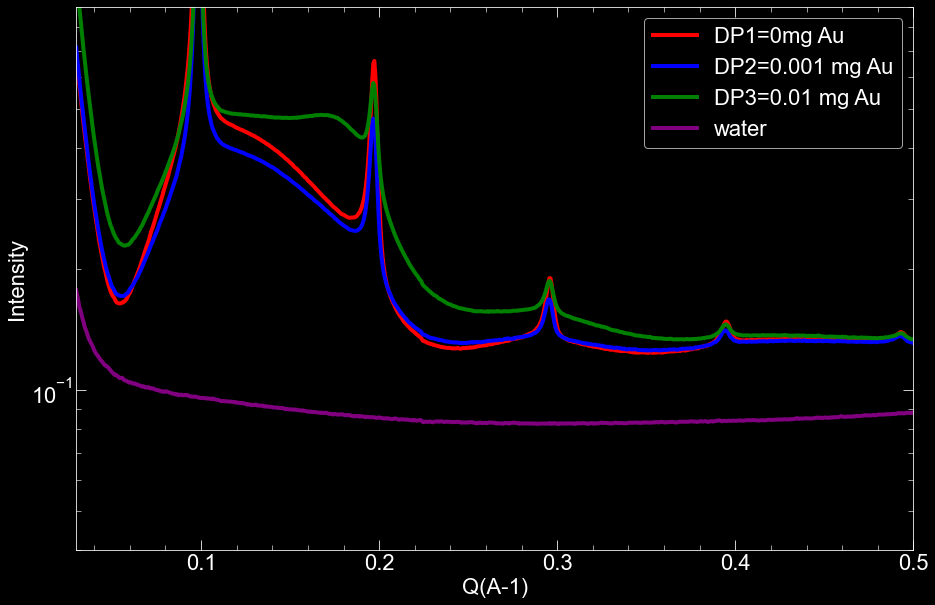

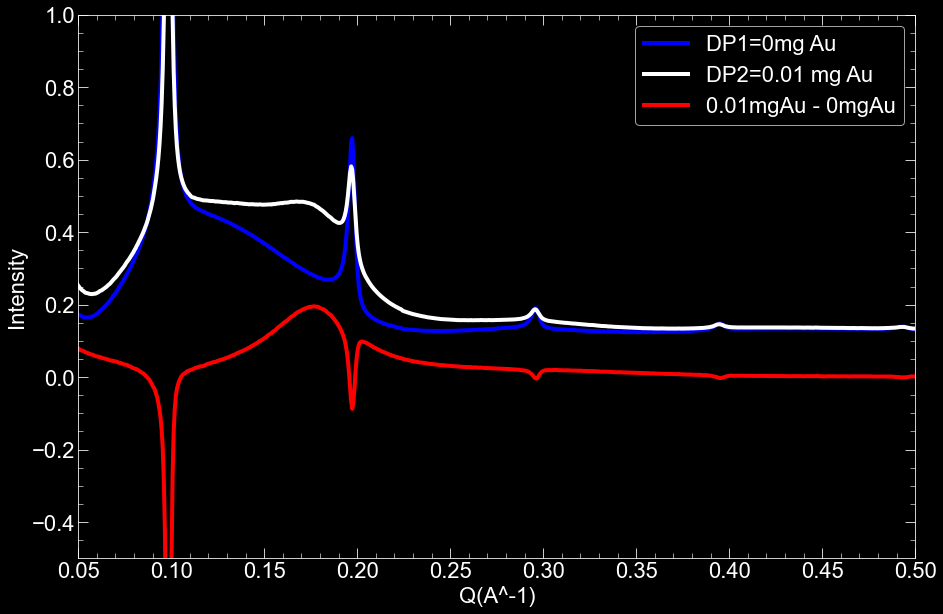

In [8]:
# 10 K DP
sametemp_dp2('SDP1_00149.dat', 'SDP2_00150.dat', 'SDP3_00151.dat','SH2O_00152.dat')
#subs('SDP1_00149.dat',  'SDP3_00151.dat','SH2O_00152.dat')
subs_dp2('SDP1_00149.dat',  'SDP3_00151.dat')

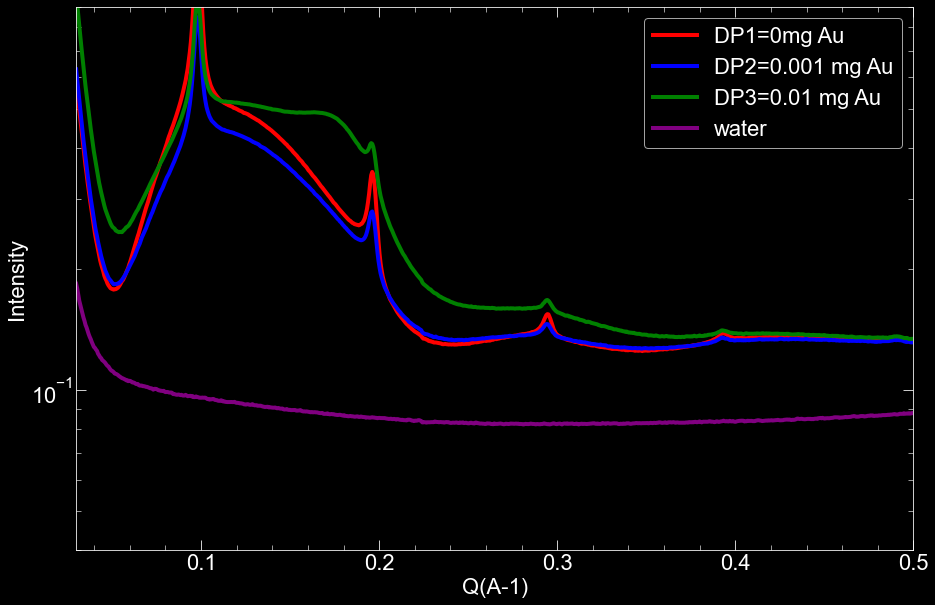

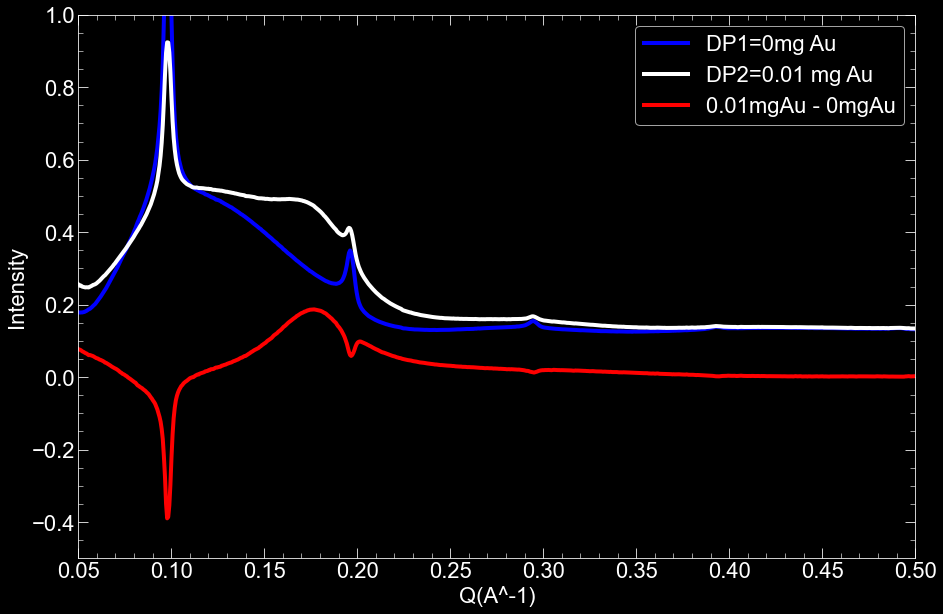

In [9]:
# 25 K DP
sametemp_dp2('SDP1_00162.dat', 'SDP2_00163.dat', 'SDP3_00164.dat','SH2O_00165.dat')
subs_dp2('SDP1_00162.dat',  'SDP3_00164.dat')

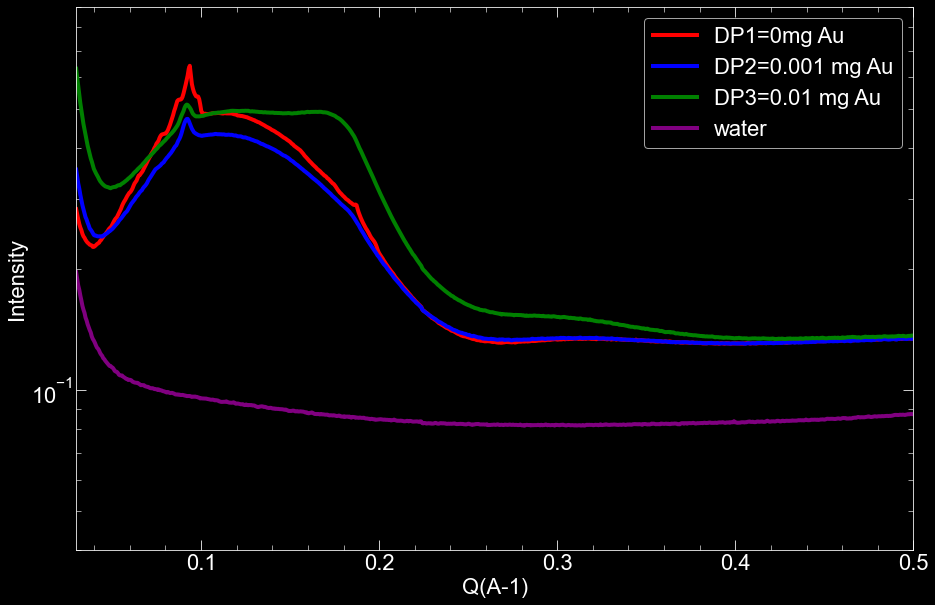

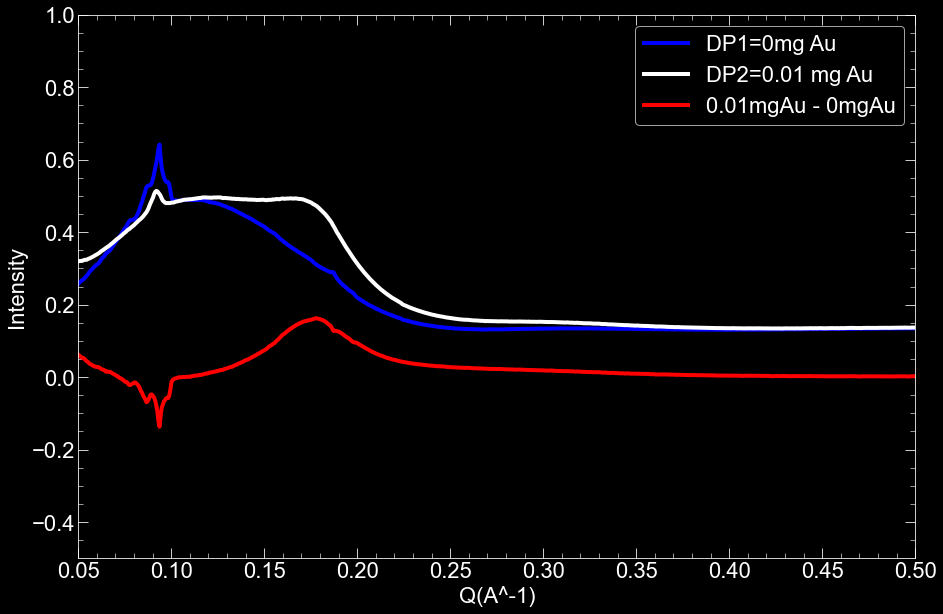

In [12]:
# 40 K DP
sametemp_dp2('SDP1_00175.dat', 'SDP2_00176.dat','SDP3_00177.dat','SH2O_00178.dat')
subs_dp2('SDP1_00175.dat', 'SDP3_00177.dat')

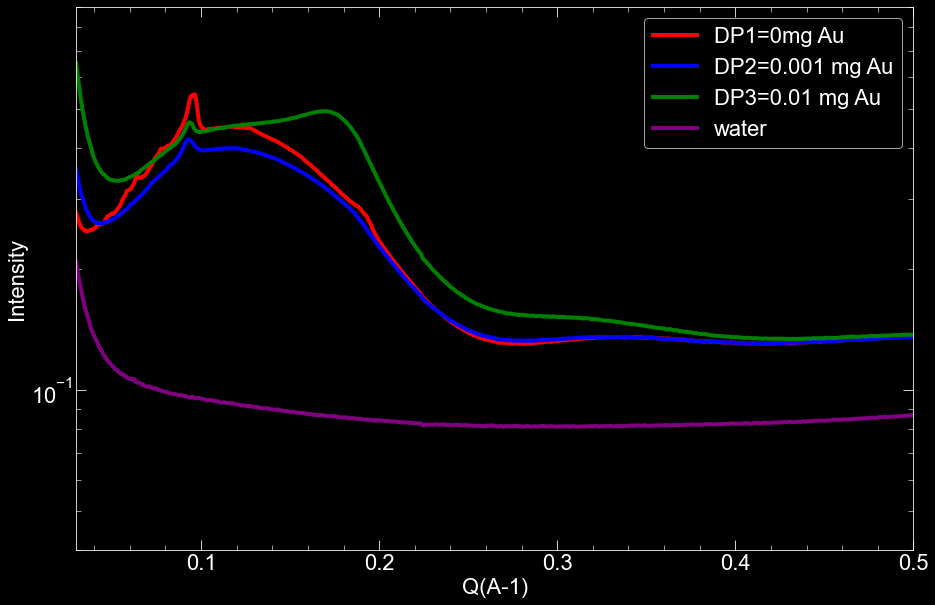

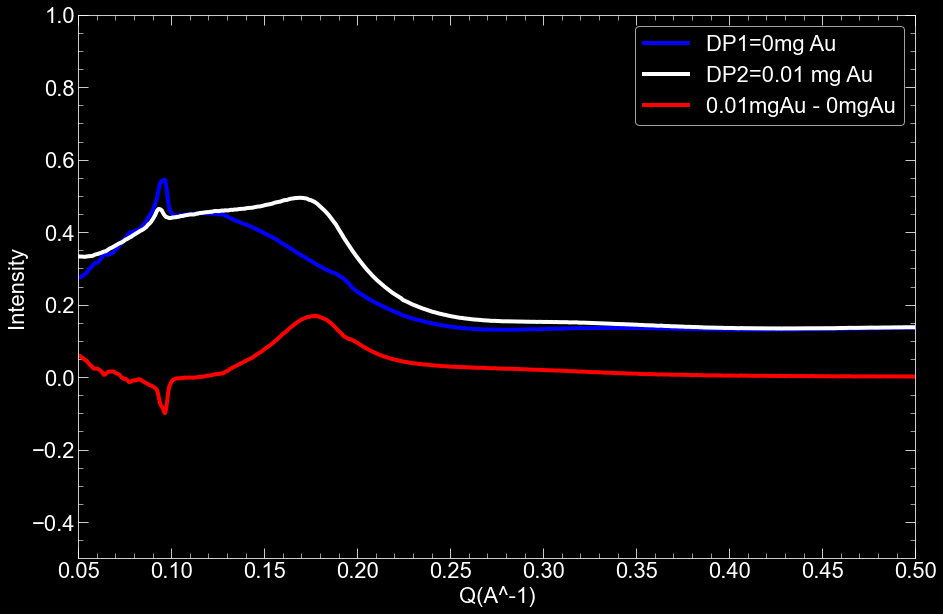

In [13]:
# 50 K DP
sametemp_dp2('SDP1_00188.dat', 'SDP2_00189.dat', 'SDP3_00190.dat','SH2O_00191.dat')
subs_dp2('SDP1_00188.dat',  'SDP3_00190.dat')

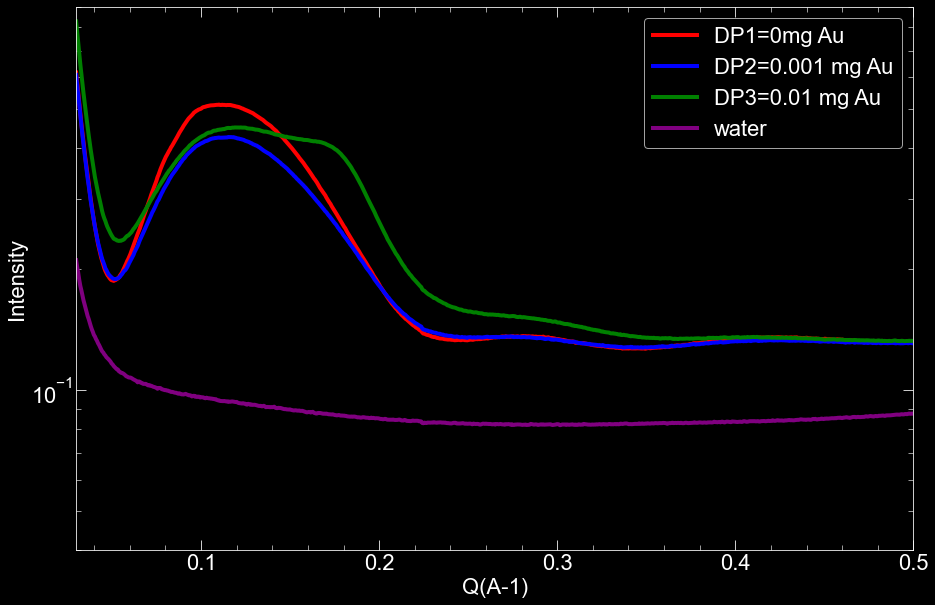

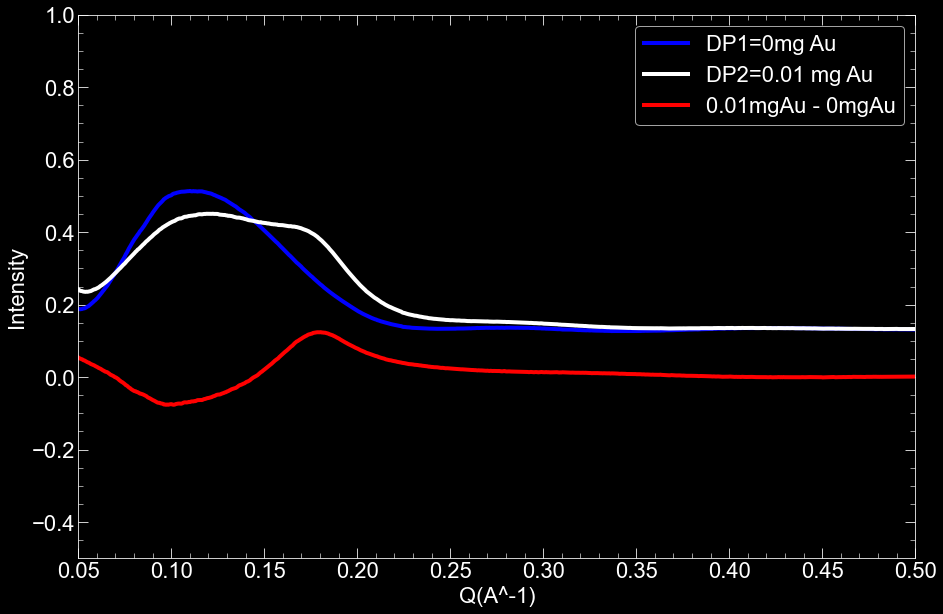

In [14]:
# 25 K DP
sametemp_dp2('SDP1_00201.dat', 'SDP2_00202.dat','SDP3_00203.dat','SH2O_00204.dat')
subs_dp2('SDP1_00201.dat', 'SDP3_00203.dat')

In [ ]:
# 20 K DP
sametemp_dp2('SDP1_00214.dat', 'SDP2_00215.dat','SDP3_00216.dat','SH2O_00217.dat')
subs_dp2('SDP1_00214.dat', 'SDP3_00216.dat')

In [ ]:
#P group substracting water
def sametemp_p( data1, data2, data3, dataw):
    dat=[data1, data2, data3]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]-df_w[:,1]
    
    color=['red','blue','green']
    lev=['P1','P2','P3']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend()
    ax.set_xlim([0.06, 0.42])
    ax.set_ylim([0.04,0.4])
    ax.set_yscale('log')
    name=data1[6:9]
    return plt.savefig('Fin'+str(name))
    plt.show()

In [ ]:
#P group without substracting water
def sametemp_p2( data1, data2, data3, dataw):
    dat=[data1, data2, data3, dataw]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    color=['red','blue','green', 'purple']
    lev=['P1=P+DPPC','P2=P+DPPC+0.0003mgAu','P3=P+DPPC+0.003mgAu', 'water']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.legend()
    ax.set_xlim([0.06, 0.42])
    ax.set_ylim([0.07,0.6])
    ax.set_yscale('log')
    name=data1[6:9]
    return plt.savefig('Fin'+str(name))
    plt.show()

In [ ]:
#substracting dppc with(0.01)Au and without gold
def subs_p( data1, data3, dataw ):
    dat=[data1, data3]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]-df_w[:,1]
    
    qf=q[0,:]
    If=I[1,:]-I[0,:]
    
    color=['blue','white']
    lev=['P1=0mgAu','P3=0.003mgAu']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.plot(qf,If, color='red',linewidth=4,label='0.01mgAu - 0mgAu')
    ax.legend()
    ax.set_xlim([0.05, 0.5])
    ax.set_ylim([-0.5, 1.5])
    #ax.set_yscale('log')
    name=data1[7:10]
    #return plt.savefig('Sub'+str(name))
    plt.show()

In [ ]:
#substracting dppc with(0.003)Au and without gold (not substracting water)
def subs_p2( data1, data3 ):
    dat=[data1, data3]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    
    q = df[:,:,0]  #size (2, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    qf=q[0,:]
    If=I[1,:]-I[0,:]
    
    color=['blue','white']
    lev=['P1=0mgAu','P3=0.003mgAu']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        ax.plot(q[i,:],I[i,:], color=color[i],linewidth=4,label=lev[i])
    ax.plot(qf,If, color='red',linewidth=4,label='0.003mgAu - 0mgAu')
    ax.legend()
    ax.set_xlim([0.05, 0.5])
    ax.set_ylim([-0.22, 0.5])
    #ax.set_yscale('log')
    name=data1[6:9]
    return plt.savefig('Sub'+str(name))
    plt.show()

In [ ]:
#P 
#P1: 40 µl miliQ water + 0.7 mg P19015 + 0.37 mg DPPC
#P2: 40 µl miliQ water + 0.7 mg P19015 + 0.37 mg DPPC + 0.0003 mg AuNPs
#P3: 40 µl miliQ water + 0.7 mg P19015 + 0.37 mg DPPC + 0.003 mg AuNPs

In [ ]:
# 10 K P 
sametemp_p2('SP1_00153_.dat', 'SP2_00154_.dat','SP3_00155_.dat','SH2O_00152.dat')
subs_p2('SP1_00153_.dat', 'SP3_00155_.dat')

In [ ]:
# 25 K P 
sametemp_p2('SP1_00166_.dat', 'SP2_00167_.dat','SP3_00168_.dat','SH2O_00165.dat')
subs_p2('SP1_00166_.dat', 'SP3_00168_.dat')

In [ ]:
# 40 K P 
sametemp_p2('SP1_00179_.dat', 'SP2_00180_.dat','SP3_00181_.dat','SH2O_00178.dat')
subs_p2('SP1_00179_.dat', 'SP3_00181_.dat')

In [ ]:
# 50 K P 
sametemp_p2('SP1_00192_.dat', 'SP2_00193_.dat', 'SP3_00194_.dat','SH2O_00191.dat')
subs_p2('SP1_00192_.dat',  'SP3_00194_.dat')

In [ ]:
# 25 K P 
sametemp_p2('SP1_00205_.dat', 'SP2_00206_.dat','SP3_00207_.dat','SH2O_00204.dat')
subs_p2('SP1_00205_.dat', 'SP3_00207_.dat')

In [ ]:
# 20 K P 
sametemp_p2('SP1_00218_.dat', 'SP2_00219_.dat','SP3_00220_.dat','SH2O_00217.dat')
subs_p2('SP1_00218_.dat','SP3_00220_.dat')

In [ ]:
#for sillicon wafers
def sametemp( data1, data2 ):
    dat=[data1, data2]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t', skip_header=12))
    df=np.array(df)
    
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[:,:,1]
    
    color=['red','blue']
    lev=['0.001 mg Au','0.01 mg Au']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(12,10))
    ax.set(ylabel='Intensity', xlabel='Q(A^-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:], color=color[i],linewidth=6,label=lev[i])
    ax.legend()
    ax.set_xlim([0.07, 0.35])
    ax.set_ylim([0.05, 0.15])
    ax.set_yscale('log')
    name=data1[0:7]
    return plt.savefig(name)
    plt.show()

In [ ]:
sametemp('SDP2_00431.dat','SDP3_tr_00.dat')

In [ ]:
sametemp('SDP2_00431_00001.dat','SDP3_tr_00562_00001.dat')

In [ ]:
#substracting water(dataec)   alihandro sample
def sametemp_wa( data1, data2):
    dat=[data1, data2]
    df=[]
    for i in range(len(dat)):
        df.append(np.genfromtxt(dat[i], delimiter='\t'))
    df=np.array(df)
    #df_w=np.genfromtxt(dataw, delimiter='\t') #for empty capilliry
    #df_w=np.array(df_w)
    q = df[:,:,0]  #size (6, 234, 3) so [:,:,0] gives q
    I=df[0,:,1]-df[1,:,1]
    
    color=['red','blue','green','white','cyan','yellow', 'purple', 'orange', 'grey']
    lev=['AF1','AF2','AF3','AF4','AF5', 'AF6', 'AF7', 'AF8', 'water']
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Q(A-1)')
    for i in range(len(dat)):
        fig=ax.plot(q[i,:],I[i,:],'o', markersize=4, color=color[i], label=lev[i])
    ax.legend()
    #ax.set_yscale('log')
    ax.set_xlim([0, 0.02])
    #ax.set_ylim([0, 10])
    name=data1[7:10]
    return plt.savefig(name)
    plt.show()

In [ ]:
#10 K  just after vortex
sametemp_wa('SAF6_00071.dat',
       'SAF8_00073.dat')



In [ ]:
#25 K   just after vortex
sametemp_wa('SAF1_00079.dat', 'SAF2_00080.dat',
        'SAF3_00081.dat','SAF4_00082.dat',
        'SAF5_00083.dat', 'SAF6_00084.dat',
        'SAF7_00085.dat','SAF8_00086.dat','Swater_00088.dat')

In [ ]:
#50 K   just after vortex
sametemp_wa('SAF1_00092.dat', 'SAF2_00093.dat',
        'SAF3_00094.dat','SAF4_00095.dat',
        'SAF5_00096.dat', 'SAF6_00097.dat',
        'SAF7_00098.dat','SAF8_00099.dat','Swater_00101.dat')

In [ ]:
#37 K   just after vortex
sametemp_wa('SAF1_00105.dat', 'SAF2_00106.dat',
        'SAF3_00107.dat','SAF4_00108.dat',
        'SAF5_00109.dat', 'SAF6_00110.dat',
        'SAF7_00111.dat','SAF8_00112.dat','Swater_00114.dat')

In [ ]:
#10 K phase seprated
sametemp_wa('SAF1_00354.dat', 'SAF2_00355.dat',
        'SAF3_00356.dat','SAF4_00357.dat',
        'SAF5_00358.dat', 'SAF6_00359.dat',
        'SAF7_00360.dat','SAF8_00361.dat','Swater_00363.dat')

In [ ]:
#25 K phase seprated
sametemp_wa('SAF1_00367.dat', 'SAF2_00368.dat',
        'SAF3_00369.dat','SAF4_00370.dat',
        'SAF5_00371.dat', 'SAF6_00372.dat',
        'SAF7_00373.dat','SAF8_00374.dat','Swater_00376.dat')

In [ ]:
#50 K phase seprated
sametemp_wa('SAF1_00380.dat', 'SAF2_00381.dat',
        'SAF3_00382.dat','SAF4_00383.dat',
        'SAF5_00384.dat', 'SAF6_00385.dat',
        'SAF7_00386.dat','SAF8_00387.dat','Swater_00389.dat')

In [ ]:
#37 K phase seprated
sametemp_wa('SAF1_00393.dat', 'SAF2_00394.dat',
        'SAF3_00395.dat','SAF4_00396.dat',
        'SAF5_00397.dat', 'SAF6_00398.dat',
        'SAF7_00399.dat','SAF8_00400.dat','Swater_00402.dat')